# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv("../data/states_edu.csv")
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [9]:
print(df["YEAR"].nunique())

13


In [10]:
# 29 (2019-1990) years of data is logged in our dataset

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [11]:
staavg = df.groupby("STATE")
staavg["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

Ohio has a higher average outcome score across all years than Michigan.

Find the average for your outcome score across all states in 2019

In [14]:
df["AVG_MATH_8_SCORE"].mean()

278.28073089700996

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [15]:
staavg = df.groupby("STATE")
staavg["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [16]:
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]

Feature engineering justification: The amount of money(expenditure) going towards instruction should have a big effect the state's 8th grade math score.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '8th Grade Math Score Over Time (13 Years) ')

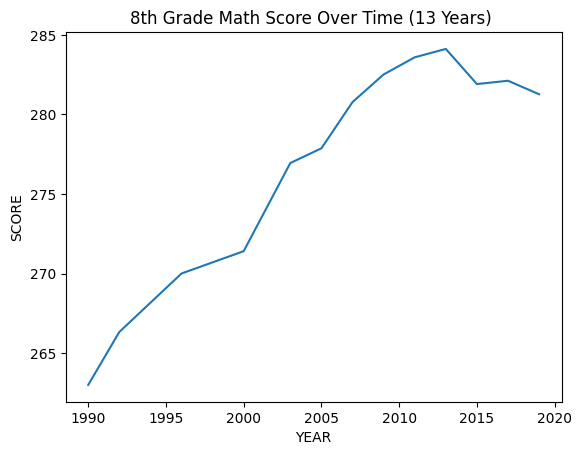

In [17]:
df.groupby("YEAR")["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel("SCORE")
plt.title("8th Grade Math Score Over Time (13 Years) ")

From 1990 to 2010, there is a visible upward trend in average 8th grade math scores. But a downward trend begins after it and although a there is increase from around 2014-2016, it doesn't get as high as the peak in 2010.

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

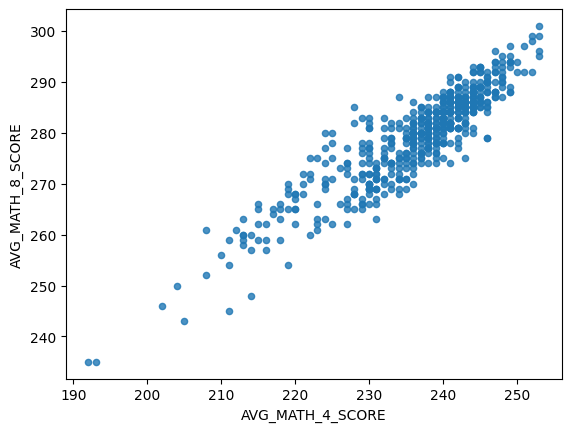

In [18]:
df.plot.scatter(x="AVG_MATH_4_SCORE", y="AVG_MATH_8_SCORE", alpha=0.8)

There is a very strong, positive correlation between the 4th grade and 8th grade math scores.

**Visualization 3**

<Axes: xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

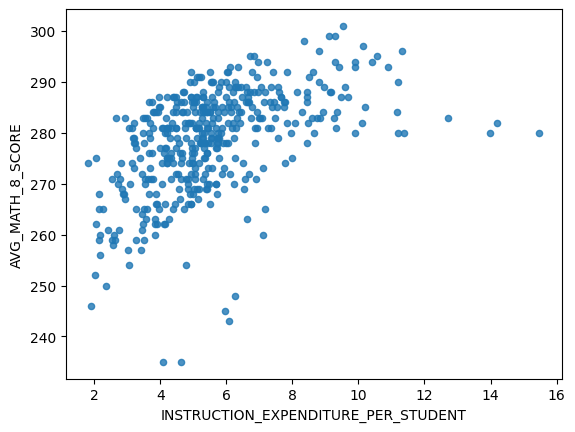

In [20]:
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", alpha=0.8)

There is a very medium, positive correlation between the intruction expenditure per student and 8th grade math scores. It's much more scattered out, however, comapred to visualization 2 so it has a weaker correlation than 4th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df[["GRADES_8_G","INSTRUCTION_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [26]:
# import your sklearn class here
from sklearn.model_selection import train_test_split

In [27]:
# my model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
# Intercepts and Coefficients
print(model.intercept_)
print(model.coef_)
# R^2 value
print(model.score(X_test, y_test))
# mean error
print(np.mean(model.predict(X_test)-y_test))
# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
# root mean squared error 
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

267.47839876168734
[-1.14225848e-05  2.19703594e+00]
0.2582171522282405
0.6988890580606919
7.299869576072686
9.937897387062815


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

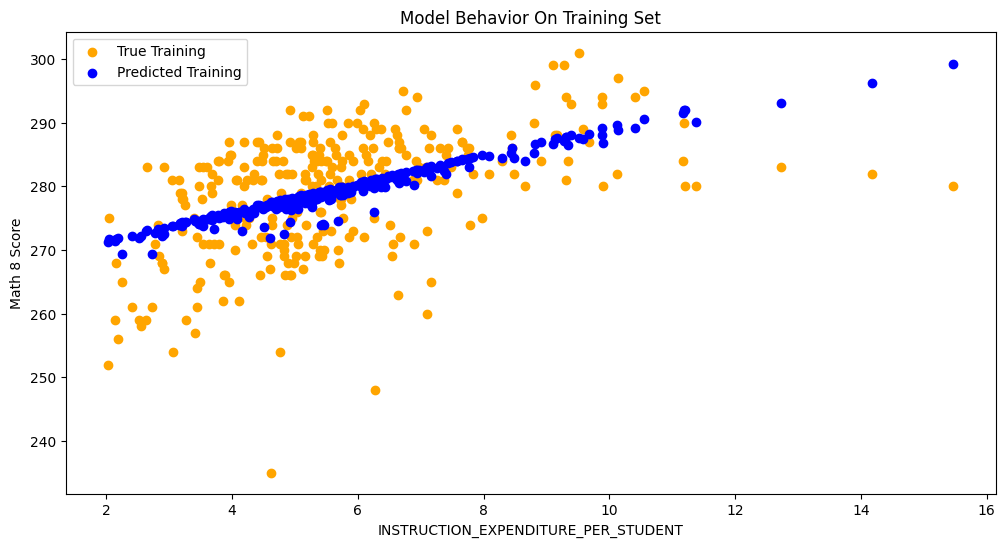

In [35]:
col_name = "INSTRUCTION_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "orange")
plt.scatter(X_train[col_name], model.predict(X_train), color = "blue")

plt.legend(["True Training","Predicted Training"])
plt.xlabel(col_name)
plt.ylabel("Math 8 Score")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

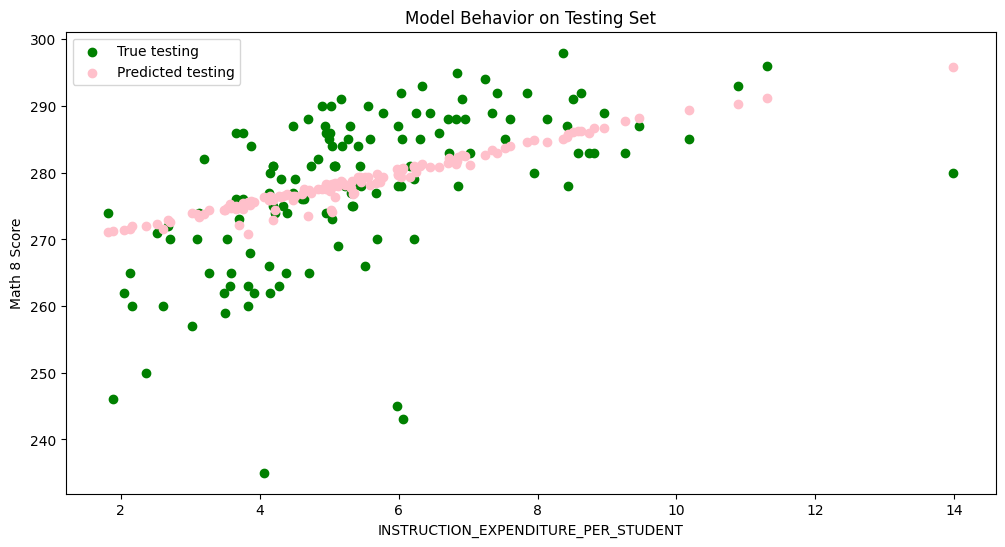

In [36]:
col_name ="INSTRUCTION_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "pink")

plt.legend(["True testing","Predicted testing"])
plt.xlabel(col_name)
plt.ylabel("Math 8 Score")
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I found out that there is a strong correlation between the explanatory variables, 4th grade math scores and instruction expenditure per student, and response variable, 8th grade math scores from creating two scatterplots. I ended up doing a linear regression model on instructed expenditure per student over 4th grade math scores. The models did well on the training and decently on the testing set. R^2 score is very high so the test model fits the least squares linear regression line fairly well. The mean, mean abolsute, and root mean-squared error furthers proves the models are quite accurate. I think based on my findings that it is possible to predict student's academic performance. I think this exact way where you eplore data, create training and testing data, and train a ML model can help you predict future outcomes and performances.